In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from stats import get_stats
from pathlib import Path
interval_dir = Path('/bsuhome/zacharykeskinen/scratch/data/uavsar/interval')
ncs_dir = Path('/bsuscratch/zacharykeskinen/data/uavsar/ncs/')

from stats import get_stats

In [2]:
df = pd.read_csv('/bsuhome/zacharykeskinen/uavsar-validation/data/interval/interval_sd_v3.csv')

df.loc[:, 'hn'] = (df['avg HN (cm)'].combine_first(df['AVG HN (cm)']))
df = df.loc[df.hn != ' ']
df = df.dropna(subset = ['int_sd_delta', 'hn']).copy()
df.loc[:, 'hn'] = df.hn.astype(float) / 100
df.loc[:, 'int_sd_delta'] = df.int_sd_delta.astype(float)
df = df.loc[df.hn != ' ']

df['swe'] = df['SWE (mm) A'].combine_first(df['SWE (mm) B'])
df = df.loc[df['swe'] != ' ']
df.loc[:, 'swe'] = df.loc[:, 'swe'].astype(float) / 100

df = df.loc[df.swe > 0]

df['den'] = df['avg DEN (kg/m^3)']
df = df.loc[df['den'] != ' ']
df.loc[:, 'den'] = df.loc[:, 'den'].astype(float) / 100

df.loc[:, 'date_t2'] = pd.to_datetime(df.loc[:, 'date_t2'])
df.loc[:, 'month'] = df.loc[:, 'date_t2'].dt.month
df = df.loc[df.swe > 0]

/tmp/ipykernel_30438/268283071.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'hn'] = df.hn.astype(float) / 100
/tmp/ipykernel_30438/268283071.py:12: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'swe'] = df.loc[:, 'swe'].astype(float) / 100
/tmp/ipykernel_30438/268283071.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

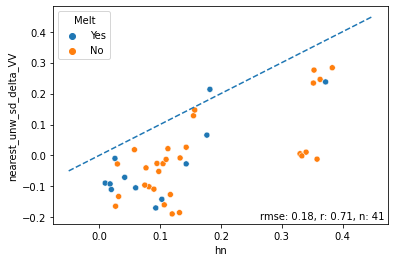

In [3]:
y = 'hn' # hn
for x in ['nearest_unw_sd_delta_VV']:
    fig, ax = plt.subplots()
    # x = 'nearest_int_sd_delta_VV'
    sub = df[~df['Comments'].str.contains('wind')].copy()
    sub = sub[~sub['Comments'].str.contains('melt')].copy()
    # sub = df.copy()
    sub.loc[:, x] = sub.loc[:, x] # * (997/250)
    sns.scatterplot(data = sub, x = y, y = x, ax = ax, hue = 'Melt')
    ax.plot([-0.05,0.45], [-0.05,0.45], linestyle = 'dashed')
    rmse, r, n = get_stats(sub[y], sub[x])
    ax.text(.99, .01, s = f'rmse: {rmse:.2f}, r: {r:.2}, n: {n}', ha = 'right', va = 'bottom', transform = ax.transAxes)
#     ax.set_xlim(0, 0.75)
#     ax.set_ylim(-0.75, 0.75)
    plt.show()

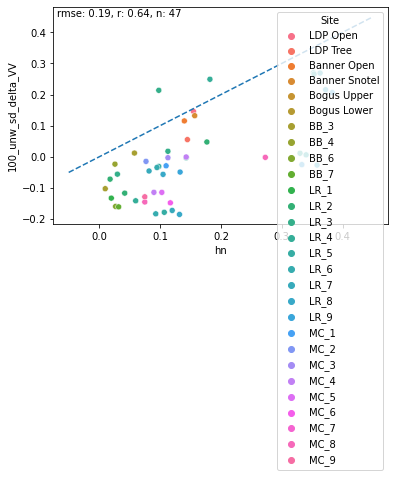

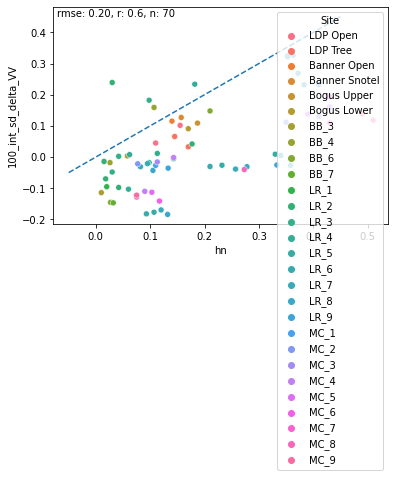

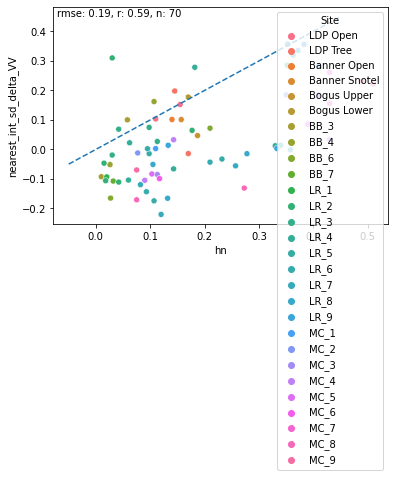

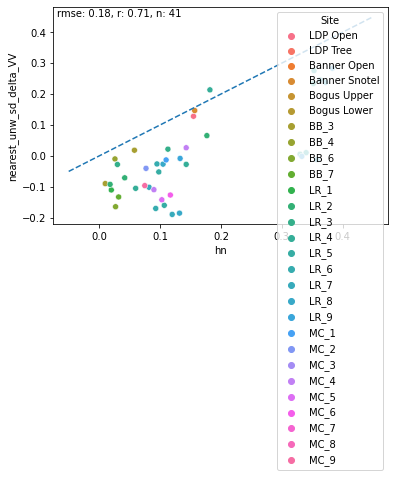

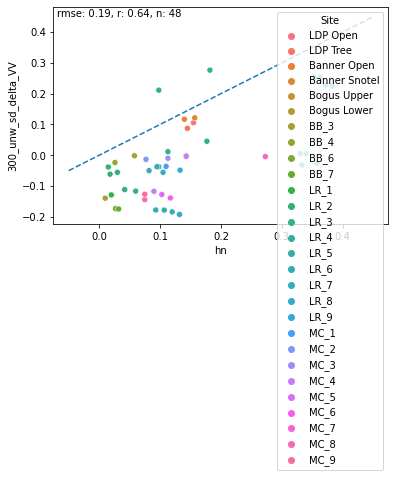

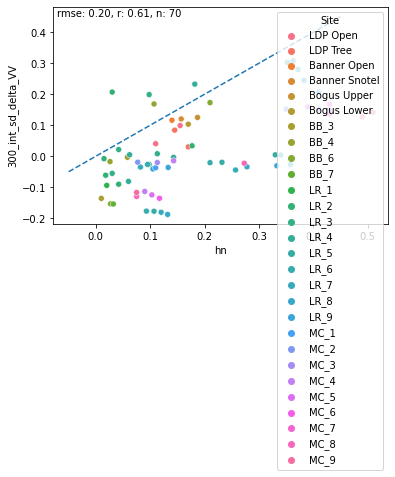

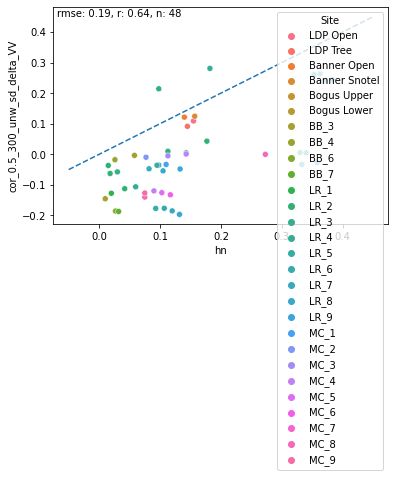

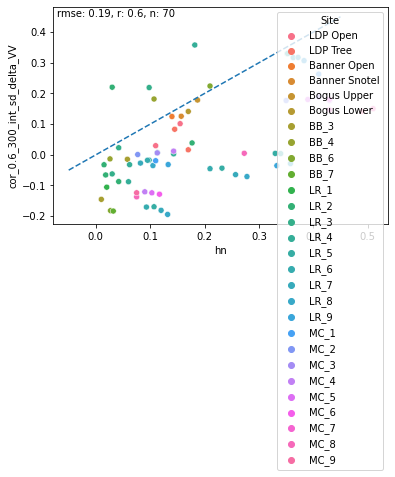

In [10]:
y = 'hn' # hn
for x in ['100_unw_sd_delta_VV', '100_int_sd_delta_VV', 'nearest_int_sd_delta_VV', 'nearest_unw_sd_delta_VV',
          '300_unw_sd_delta_VV', '300_int_sd_delta_VV', 'cor_0.5_300_unw_sd_delta_VV', 'cor_0.6_300_int_sd_delta_VV']:
    fig, ax = plt.subplots()
    sub = df[~df['Comments'].str.contains('wind')].copy()
    sub = sub[~sub['Comments'].str.contains('melt')].copy()
    # sub = df.copy()
    sub.loc[:, x] = sub.loc[:, x] # * (997/250)
    sns.scatterplot(data = sub, x = y, y = x, ax = ax, hue = '300_coh')
    ax.plot([-0.05,0.45], [-0.05,0.45], linestyle = 'dashed')
    rmse, r, n = get_stats(sub[y], sub[x])
    ax.text(.01, .99, s = f'rmse: {rmse:.2f}, r: {r:.2}, n: {n}', ha = 'left', va = 'top', transform = ax.transAxes)
#     ax.set_xlim(0, 0.75)
#     ax.set_ylim(-0.75, 0.75)
    plt.show()

In [15]:
sub.loc[:, 'sd_diff'] = sub.loc[:, 'hn'] - sub.loc[:, 'nearest_unw_sd_delta_VV']

<AxesSubplot:xlabel='hn', ylabel='nearest_unw_sd_delta_VV'>

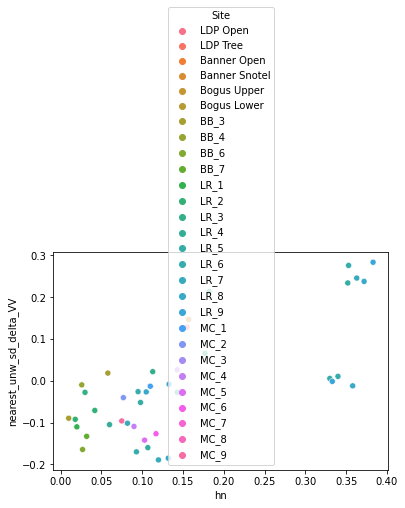

In [13]:
sub = df[~df['Comments'].str.contains('wind')].copy()
sub = sub[~sub['Comments'].str.contains('melt')].copy()
# sub = df.copy()
sub.loc[:, x] = sub.loc[:, x] # * (997/250)
sns.scatterplot(data = sub, x = 'hn', y = 'nearest_unw_sd_delta_VV', hue = 'Site')

In [19]:
sub.dropna(subset = 'sd_diff').sort_values('sd_diff')[['Site','PitID','sd_diff']]

,Site,PitID,sd_diff
215,LR_4,IDBRL4,-0.031653
26,Banner Snotel,IDBRBS,0.010183
3,LDP Open,IDBRLO,0.026649
141,BB_4,IDBRB4,0.035672
138,BB_3,IDBRB3,0.039453
204,LR_3,IDBRL3,0.057552
235,LR_6,IDBRL6,0.077064
205,LR_3,IDBRL3,0.091043
136,BB_3,IDBRB3,0.099350
261,LR_9,IDBRL9,0.099451


<AxesSubplot:xlabel='sd_diff', ylabel='Melt'>

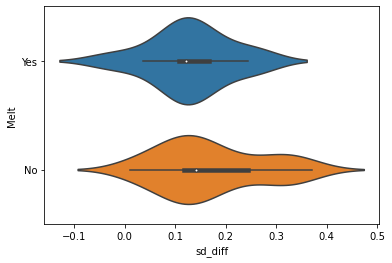

In [110]:
sns.violinplot(data = sub, x= 'sd_diff', y = 'Melt')

<AxesSubplot:xlabel='300_coh', ylabel='sd_diff'>

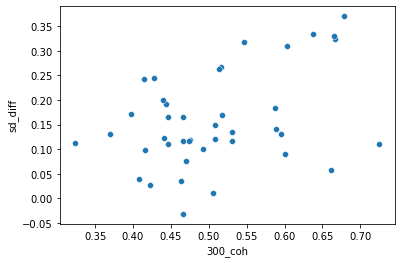

In [111]:
sns.scatterplot(data = sub, y = 'sd_diff', x = '300_coh')

<AxesSubplot:xlabel='den', ylabel='sd_diff'>

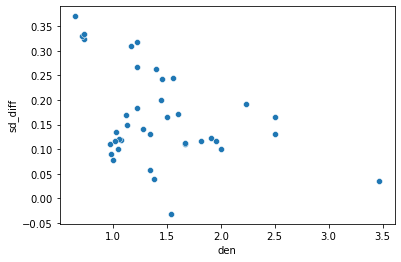

In [112]:
sns.scatterplot(data = sub, y = 'sd_diff', x = 'den')

<AxesSubplot:xlabel='date_t2', ylabel='sd_diff'>

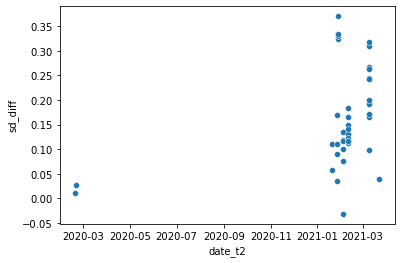

In [113]:
sns.scatterplot(data = sub, y = 'sd_diff', x = 'date_t2')

<AxesSubplot:xlabel='month', ylabel='sd_diff'>

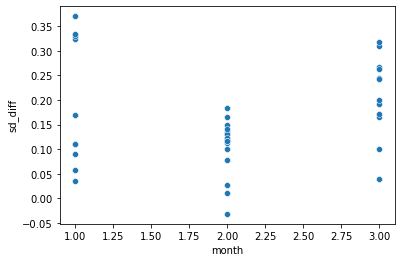

In [114]:
sns.scatterplot(data = sub, y = 'sd_diff', x = 'month')

<AxesSubplot:xlabel='Latitude', ylabel='sd_diff'>

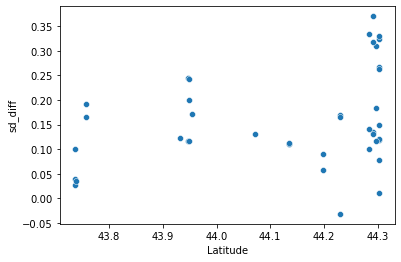

In [115]:
sns.scatterplot(data = sub, y = 'sd_diff', x = 'Latitude')

<AxesSubplot:xlabel='Longitude', ylabel='sd_diff'>

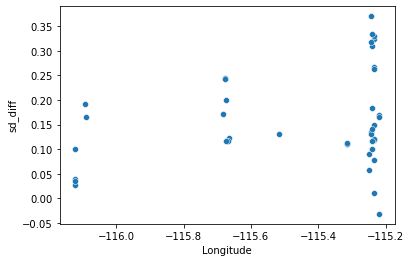

In [116]:
sns.scatterplot(data = sub, y = 'sd_diff', x = 'Longitude')